# Exploring Cancer Data
The data was extracted from kaggle in __[CancerData] (https://www.kaggle.com/datasets/erdemtaha/cancer-data?resource=download)__

### Basic information about the proyect: 
**Date:** _03 - 12 - 2024_ 

**Affiliation:**_Universidad Icesi_

**Course:** _Analisis Exploratorio de datos_ 

**Name:** _Simon Garcia_ 

**Description**: The following proyect is used to extract, organize, make a preliminary analysis and some simple models about a breast cancer dataset using python. 

## SMART question:

Teniendo en cuenta la base de datos proveida, ¿Cuáles parámetros son los más importantes para generar el modelo más exacto posible que prediga si el cancer mamario de un paciente es maligno o benigno?

## Upload the data

In [166]:
#Import the libraries that will be used
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [167]:
#Upload the data set
data = pd.read_csv("Cancer_Data.csv", header = None)

#Check if the data is there
data.head()


,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,NaN
1,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,NaN
2,842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902,NaN
3,84300903,M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,...,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758,NaN
4,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,...,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173,NaN


In [168]:
#The titles are in row one. The dataset upload can be adjusted so the titles are included.
data = pd.read_csv("Cancer_Data.csv", header = 0)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Analize the main patterns in the structure
1. Data Frame Size
2. Columns
3. Names
    - Check for descriptive names
4. Data types
5. Scales

In [169]:
#print the total size of the DataSet 
data.shape
#Its composed of 569 entries and 33 columns

(569, 33)

In [170]:
#Here we can see all the names of the variables and check if they need fixing
data.columns
#The Unnamed column should be checked afterwards to see what data it has and if it should be changed

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [171]:
#Printing the basic information of the dataset
data.info()

#The dataset seems to have no null entries, except for the last column called "unnamed" which is completely filled with nulls.
#From the remaining 32 columns, 31 are floats.
#The only int is ID
#The only object is Diagnosis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [172]:
#That being said, the ID of a patient doesnt do anything so we take it out
data = data.drop('id', axis=1)

#The Unnamed:32 collumn doesnt do much either so we drop it too
data = data.drop('Unnamed: 32',axis=1)

## Division between the categorical and numerical variables

### Categorical variables

In [173]:
#First we'll see the unique entries for diagnosis
print(data["diagnosis"].unique())

['M' 'B']


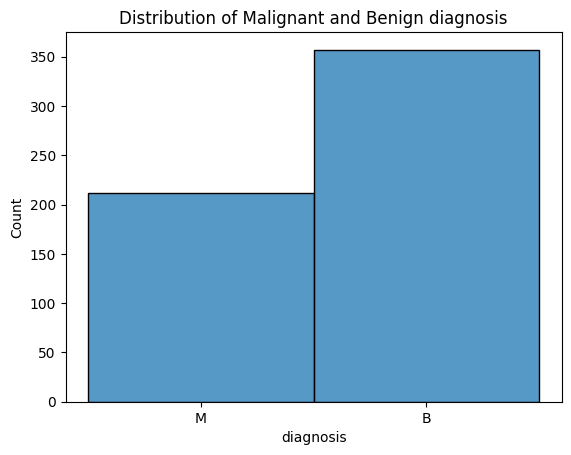

In [174]:
#Lets quickly see the proportion between malignant and benign patients
sns.histplot(data["diagnosis"])

#Add a title to the chart
plt.title("Distribution of Malignant and Benign diagnosis")
plt.show()

In [175]:
#Now we're going to encode the target variable so there are no problems later in the analysis
#1 = Malignant
#2 = Benign

data["diagnosis"] = data["diagnosis"].replace({"M":1,"B":0})

data[["diagnosis"]].tail(10)

C:\Users\SIMON\AppData\Local\Temp\ipykernel_51252\3592988370.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["diagnosis"] = data["diagnosis"].replace({"M":1,"B":0})


,diagnosis
559,0
560,0
561,0
562,1
563,1
564,1
565,1
566,1
567,1
568,0


## Numerical Variables

In [176]:
#Now we observe the rest of float variables, excluding: ID, diagnosis and Int_diagnosis
parameters = data[data.columns[1:]]
parameters

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


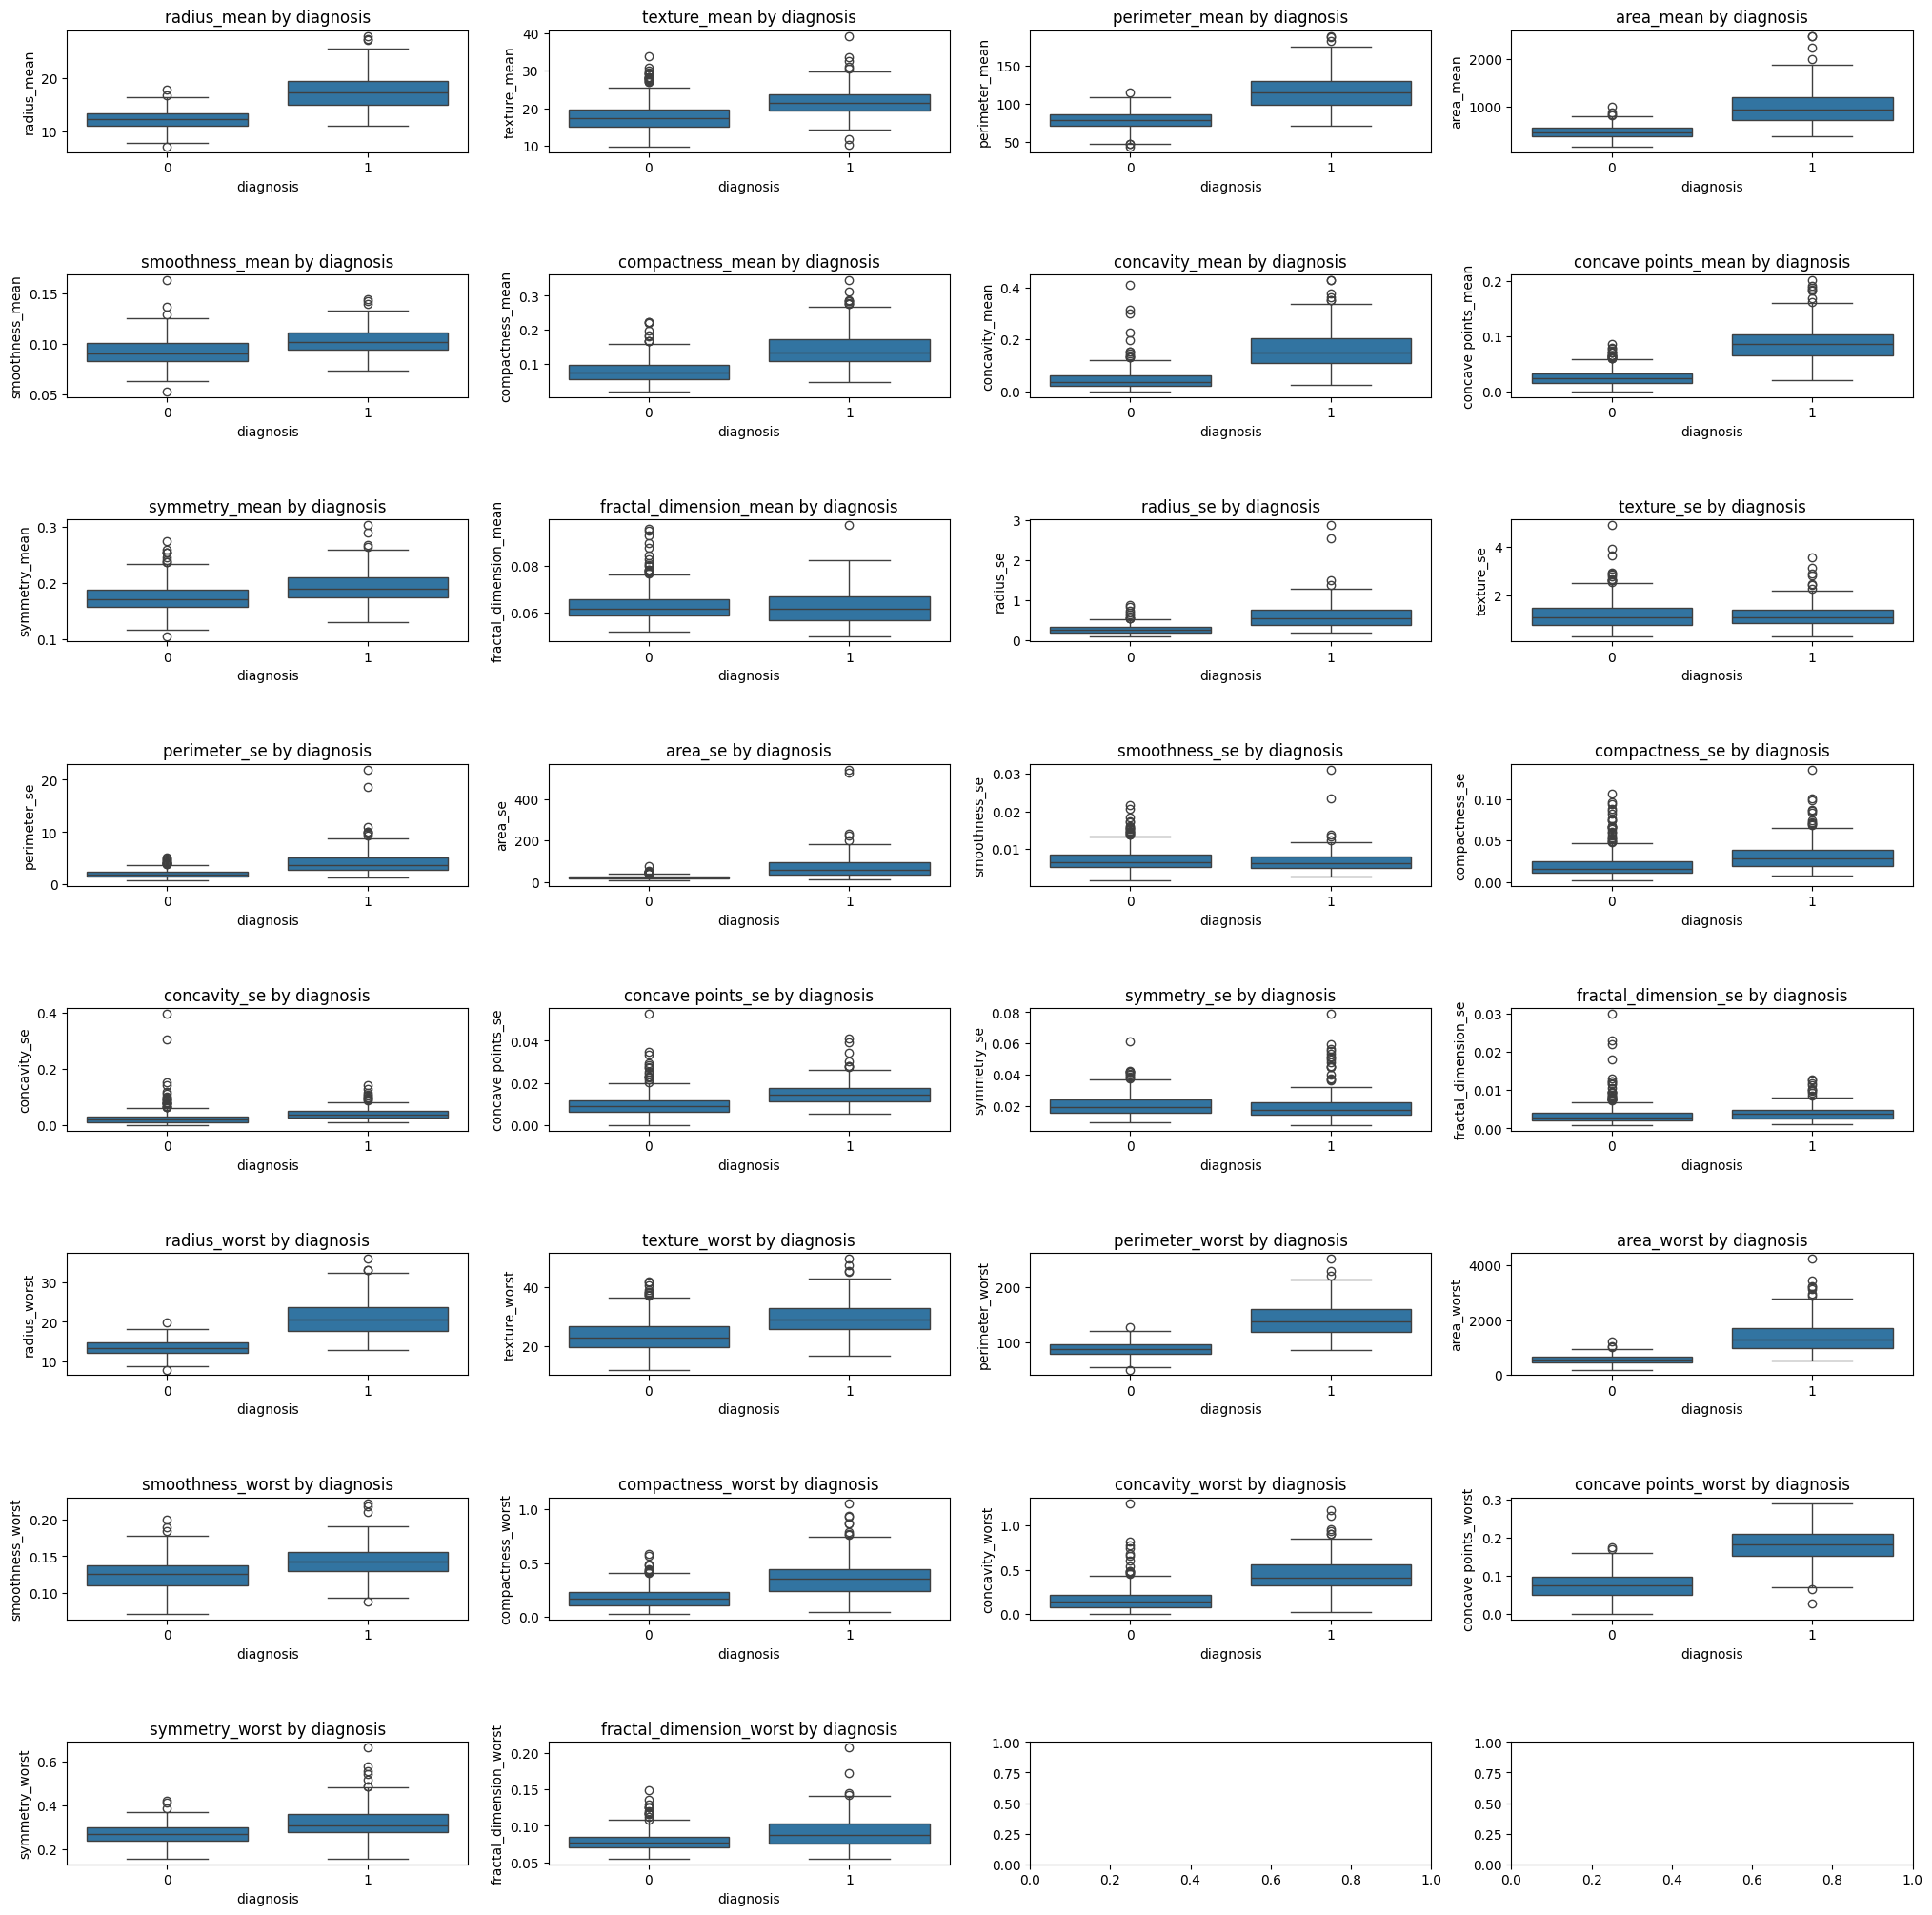

In [177]:
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(25, 25))
fig.subplots_adjust(hspace=1)

axes = axes.flatten()

for i, column in enumerate(parameters.columns):
    sns.boxplot(x="diagnosis", y=column, data=data, ax=axes[i])
    axes[i].set_title(f'{column} by {"diagnosis"}')
    axes[i].set_xlabel("diagnosis")
    axes[i].set_ylabel(column)

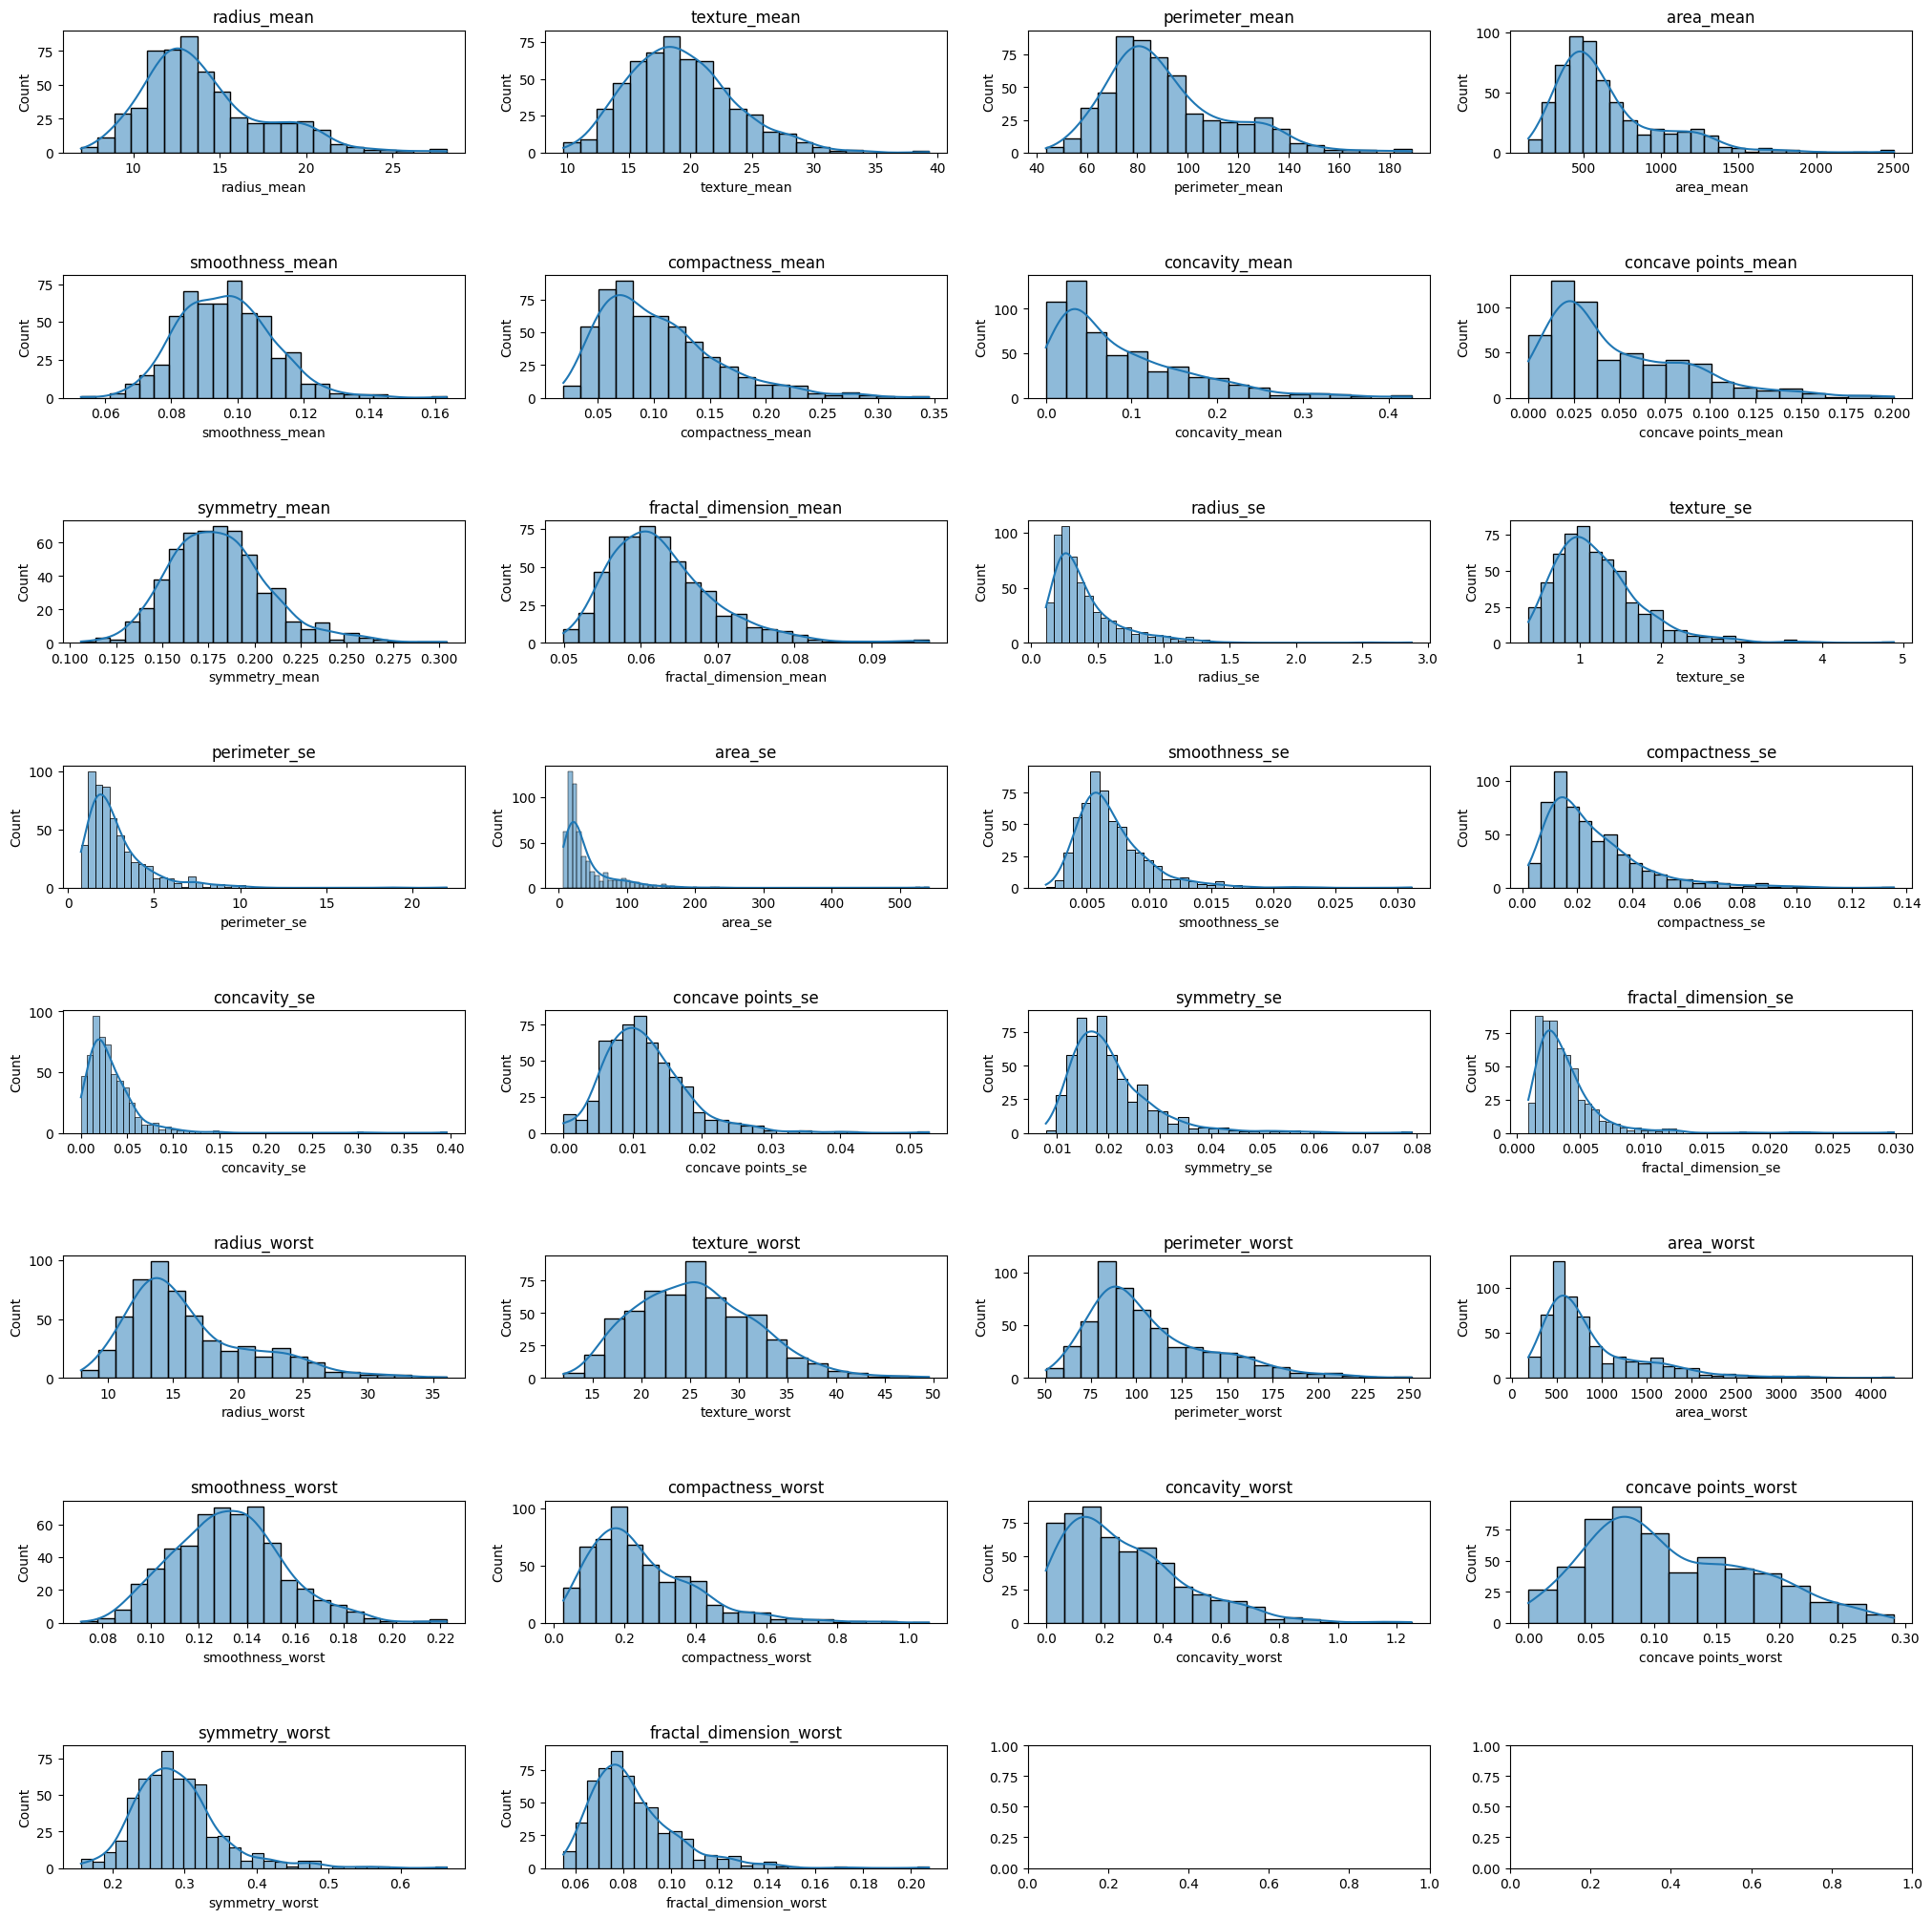

In [178]:
#In the graph above the varibales show that  a malignant cancer appers to have higher values inside every varibale, but olso show the biggest deviation 

#now we will look at the general distribution of the data and see how it behaves
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(25, 25))
fig.subplots_adjust(hspace=1)

axes = axes.flatten()

for i, column in enumerate(parameters.columns):
    sns.histplot(x=column, data = data, kde = True , ax=axes[i])
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel(column)

The graph above shows that the variables behave themselves in a manner similar to **normal** or **poisson distribution** in some cases.

Additionally, the disproportion between malignant and benign cases seem to be a misrepresentation of the population. The histogram revealed there were more benign patients, and the **histrogram** for the numerical values showed that the patients with malignant cancer showed higher values in every category. Taking a closer look to the histograms of the numerical variables, many data seats seem to be leaing towards the left side instead the middle.

This means the the _lower values_ are represented in bigger proportion than the _higher values_ so the malignant cancer is underrepresented.

This means, there will be _no_ need to compensate for the dispropotion. 

## Deciding on variables

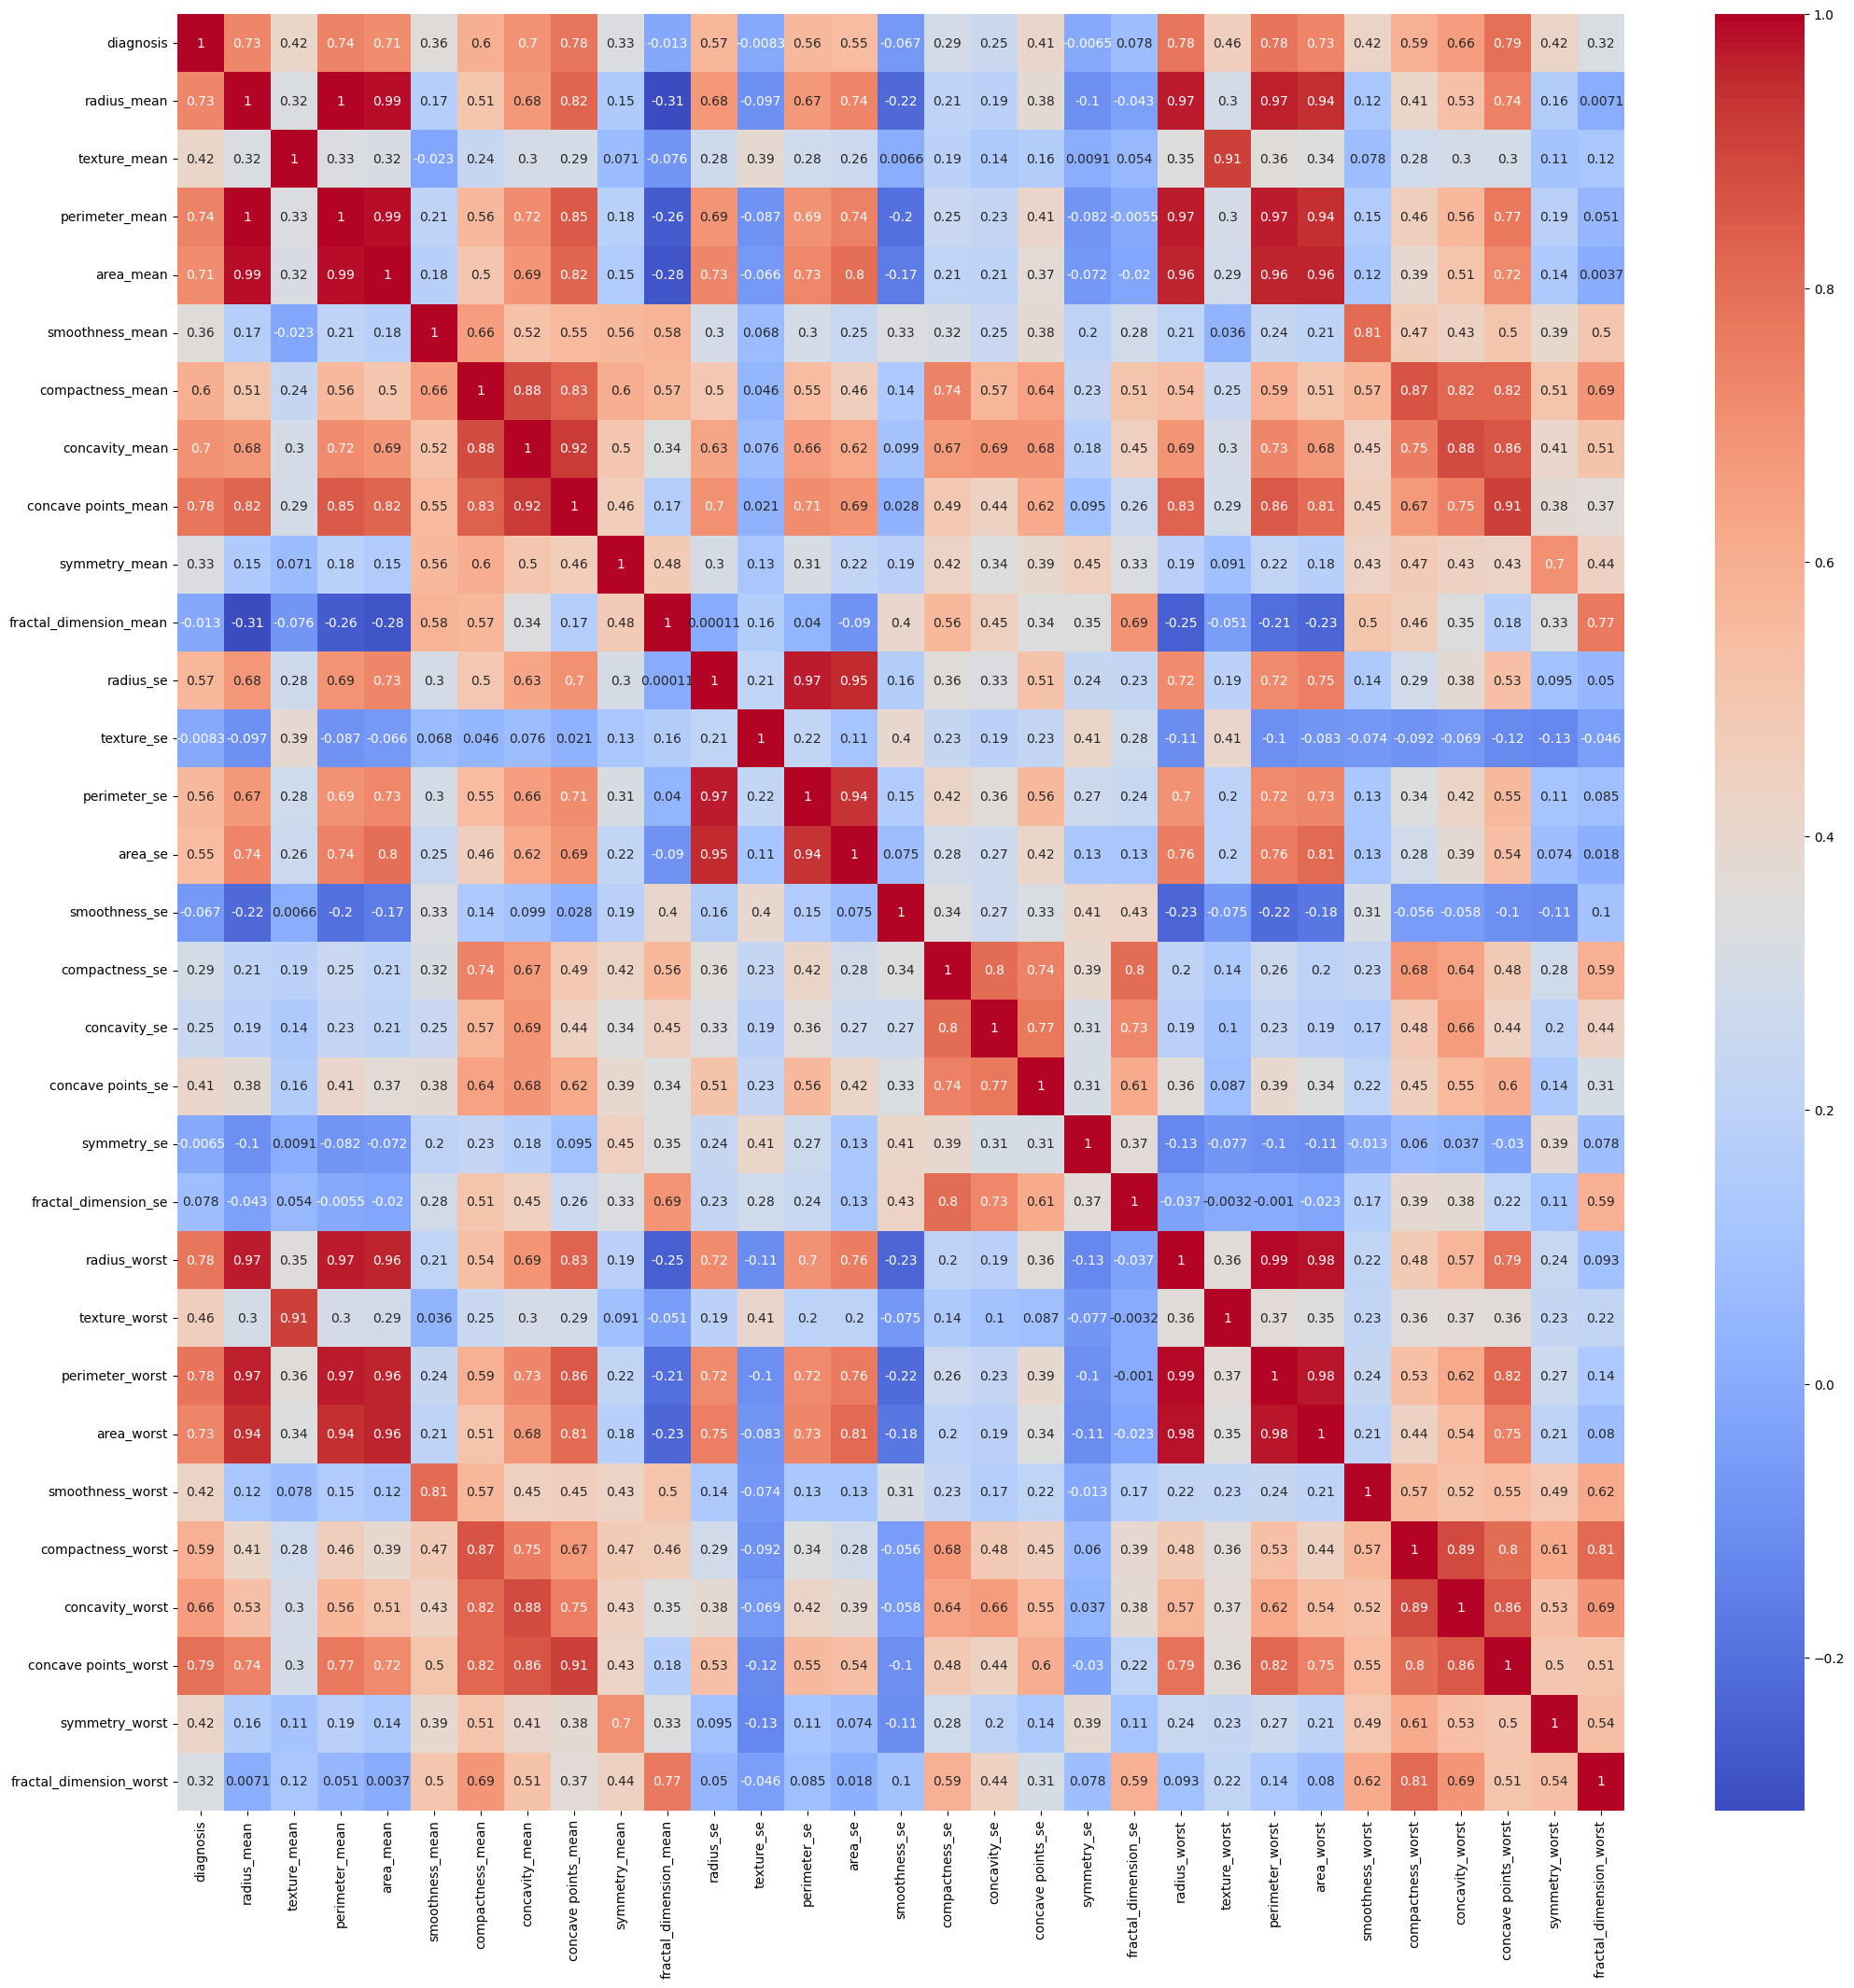

In [179]:
#Here we are going to test the correlations between the variables
matrix = data.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(matrix, cmap='coolwarm', annot=True)
# mostrar el mapa de calor
plt.show()

The following graph shows that one of the best predictors is "**concave points_worst**"
The other variables show high multicollinearrity, and those that are not collinear are terrible at predicting the model
We additionally consider **texture_mean**, **fractal_dimension_mean** and **symmetry_mean**.

Either way, we will do a _VIF_ test to see how all the parameters are related to each other.

In [180]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'X' is your design matrix
vif_data = pd.DataFrame()
vif_data["Variable"] = parameters.columns
vif_data["VIF"] = [variance_inflation_factor(parameters.values, i) for i in range(parameters.shape[1])]

vif_data

,Variable,VIF
0,radius_mean,63306.172036
1,texture_mean,251.047108
2,perimeter_mean,58123.586079
3,area_mean,1287.262339
4,smoothness_mean,393.398166
5,compactness_mean,200.980354
6,concavity_mean,157.855046
7,concave points_mean,154.241268
8,symmetry_mean,184.426558
9,fractal_dimension_mean,629.679874


From the VIF test we checked that the predicted values indeed show high multicollinearity.
That being said, we'll change:
- replace **fractal_dimension_mean** for **fractal_dimension_se**
- add **smoothness_se**

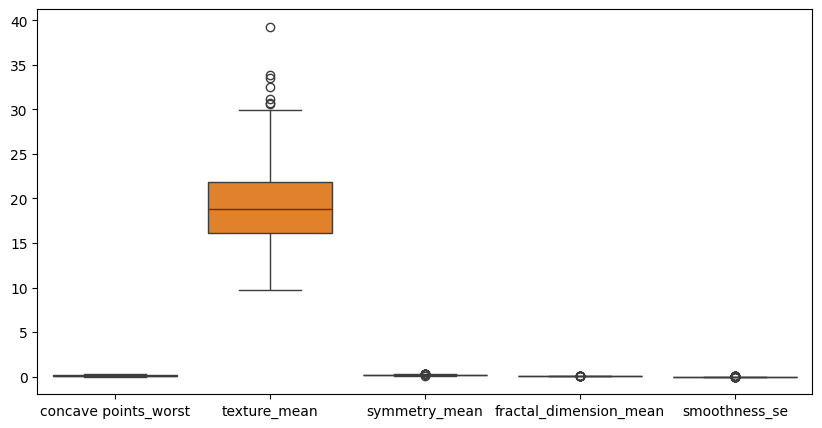

In [181]:
#Now we check for outliers in our variables:

outliersTest = data[["concave points_worst", "texture_mean", "symmetry_mean", "fractal_dimension_mean", "smoothness_se"]]
# Creting a boxplot to check for outliers in both testing variables
plt.figure(figsize=(10, 5))
sns.boxplot(outliersTest)

# show the graph
plt.show()

Only **concava points_worst** doesn't have outliers.

We will separate **texture_mean** from the rest since it is displacing the rest of the graph.

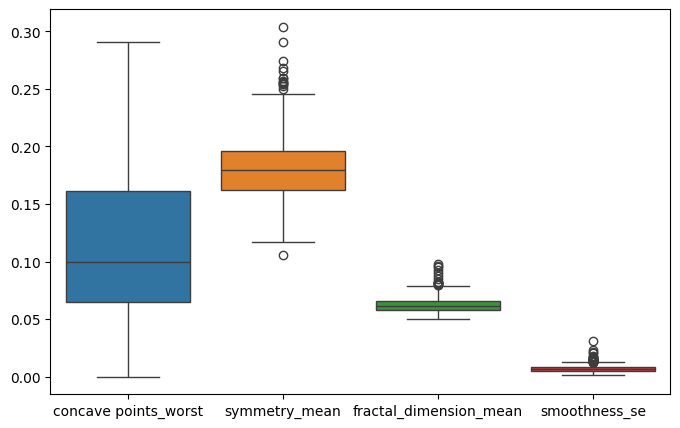

In [182]:
#Now we check for outliers in our variables:

outliersTest = data[["concave points_worst", "symmetry_mean", "fractal_dimension_mean", "smoothness_se"]]
# Creting a boxplot to check for outliers in both testing variables
plt.figure(figsize=(8, 5))
sns.boxplot(outliersTest)

# show the graph
plt.show()

Based on the graph above, the other parameters (excluding **texture_mean**) show quite a number of outliers.

First we will work with the outliers and not normalize to show the effect of those steps in a standard model.

## Model with no corrections

In [204]:
#First we separate the parameters and the target varibles
y = data['diagnosis']
X = data[["concave points_worst", "symmetry_mean", "fractal_dimension_mean", "smoothness_se", "texture_mean"]]

#Then we separate the data between the tests and the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#Then we train the model and fit it
model= RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy Score:  0.9210526315789473


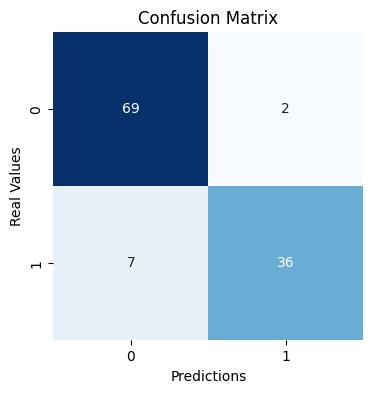

In [206]:
print("Accuracy Score: ", accuracy_score(y_test, model.predict(X_test)))

# show the confusion matrix
confu_matrix = confusion_matrix(y_test, model.predict(X_test))
plt.figure(figsize=(4, 4))
sns.heatmap(confu_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predictions')
plt.ylabel('Real Values')
plt.title('Confusion Matrix')
plt.show()

## Taking care of the outliers

In [185]:
#We are going to use Z score to test for outliers so we need:
from scipy import stats
#Zcore didnt work?
import numpy as np

In this case, we're going to do a Z score test and check if a data point is **greater** than _2.5_ deviations from the mean.

If that happens, we'll replace the value with the mean of the column.

Data with outliers


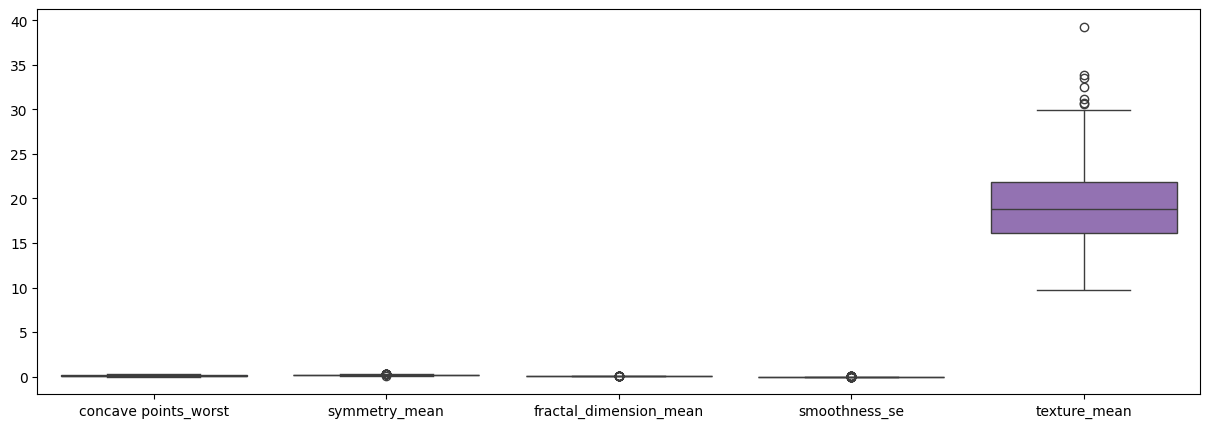

Data without outliers: 


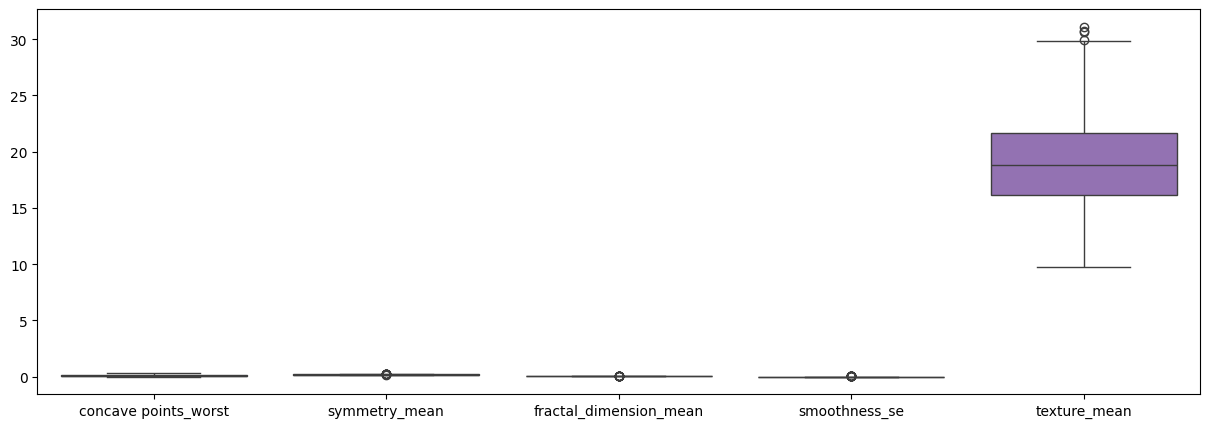

In [211]:
X_no_outliers = X.copy()

#Here we made a function to replace the values that are greater than 2.5 SD from the mean with the column average. By hand version of Zscore test.
#The parameter that needs to be entered is a data frame that contains only the numeric variables.
def replace_outliers_with_mean(df):
    for col in df.columns:
        mean_value = df[col].mean()
        std_dev = df[col].std()
        outliers = (df[col] - mean_value).abs() > 3 * std_dev
        df.loc[outliers, col] = mean_value
    return df
X_no_outliers = replace_outliers_with_mean(X_no_outliers)

#Now we print and compare varibles again and see the distribution without the outliers
print("Data with outliers")
plt.figure(figsize=(15, 5))
sns.boxplot(X)

# show the graph
plt.show()

print("Data without outliers: ")
plt.figure(figsize=(15, 5))
sns.boxplot(X_no_outliers)

# show the graph
plt.show()

Now we are going to run through the same model we did before:

Accuracy Score:  0.9210526315789473


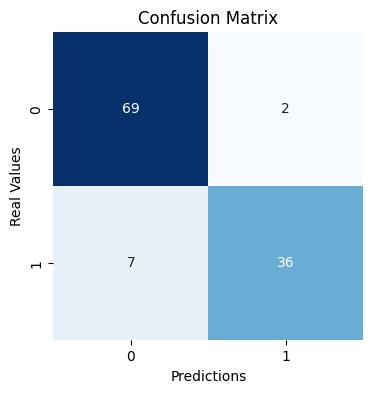

In [212]:
#First we separate the parameters and the target varibles
y = data['diagnosis']
X = X_no_outliers

#Then we separate the data between the tests and the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#Then we train the model and fit it
model= RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("Accuracy Score: ", accuracy_score(y_test, model.predict(X_test)))

# show the confusion matrix
confu_matrix = confusion_matrix(y_test, model.predict(X_test))
plt.figure(figsize=(4, 4))
sns.heatmap(confu_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predictions')
plt.ylabel('Real Values')
plt.title('Confusion Matrix')
plt.show()

As you can see, changing the outliers didnt do anything. In this case, the difference between the models is not significant. In other cases if the outliers were a lot more, it could have a bigger impact.

## Normalizing the data

Now we're going to see if normalizing the data has a bit impact on the data set.

First, we'll do some **Q-Q plots** to see how the variables are doing normality-wise.

Second, we'll do a **Shapiro-Wilk** test to see double check if the data set even needs to be normalized.

IndexError: index 5 is out of bounds for axis 0 with size 5

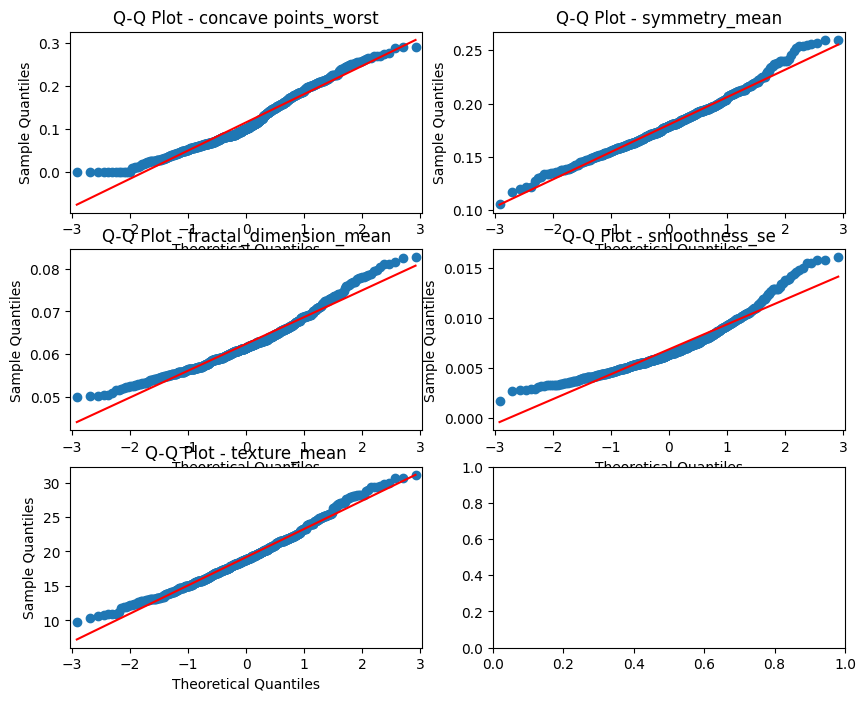

In [216]:
import statsmodels.api as sm

#Fix the axis for 6 plots since there are 5 variables
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

# Create a Q-Q plot for the specified variable

# Loop through the variables and create Q-Q plots
for i, ax in enumerate(axes.flatten()):
    variable_data = X[X.columns[i]]
    sm.qqplot(variable_data, line='s', ax=ax)
    ax.set_title(f'Q-Q Plot - {X.columns[i]}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#Here we do a loop for each one
# for n in range(X.shape[1]):
#     sm.qqplot(X.iloc[:,n], line='s')
#     plt.title(f'Q-Q Plot - {X.columns[n]}')
#     plt.show()

In [217]:
from scipy.stats import shapiro

for n in range(X.shape[1]):
    print(X.columns[n])
    
    # Perform Shapiro-Wilk test
    statistic, p_value = shapiro(X.iloc[:,n])

    # Display the results
    print(f"        Shapiro-Wilk Statistic: {statistic}")
    print(f"        P-value: {p_value}")

    # Interpret the results
    alpha = 0.05  # significance level
    if p_value > alpha:
        print("     Sample looks Gaussian (fail to reject H0)")
    else:
        print("     Sample does not look Gaussian (reject H0)")

concave points_worst
        Shapiro-Wilk Statistic: 0.964835250118347
        P-value: 1.9848789180472218e-10
     Sample does not look Gaussian (reject H0)
symmetry_mean
        Shapiro-Wilk Statistic: 0.9866170453333216
        P-value: 4.4363421396838365e-05
     Sample does not look Gaussian (reject H0)
fractal_dimension_mean
        Shapiro-Wilk Statistic: 0.9641154948393764
        P-value: 1.4484381612005228e-10
     Sample does not look Gaussian (reject H0)
smoothness_se
        Shapiro-Wilk Statistic: 0.9290879539749815
        P-value: 9.249713020523935e-16
     Sample does not look Gaussian (reject H0)
texture_mean
        Shapiro-Wilk Statistic: 0.9853140020721375
        P-value: 1.7053389875115937e-05
     Sample does not look Gaussian (reject H0)


Aunque los Q-Q plots parecian mostrar que los residuos tenian un comportamiento normal, la prueba de Shapiro-Wilk afirma lo contrario, por lo que se deben **normalizar**.

In [218]:
from sklearn.preprocessing import MinMaxScaler


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler (learn the transformation parameters)
scaler.fit(X)

# Now you can use the transform method to normalize new data
X_normalized = scaler.transform(X)
print(f"Starting data: {X}")
print("-----------------------------------------------------------")
print(f"Normalized data: {X_normalized}")

Starting data:      concave points_worst  symmetry_mean  fractal_dimension_mean  \
0                  0.2654         0.2419                0.078710   
1                  0.1860         0.1812                0.056670   
2                  0.2430         0.2069                0.059990   
3                  0.2575         0.2597                0.062798   
4                  0.1625         0.1809                0.058830   
..                    ...            ...                     ...   
564                0.2216         0.1726                0.056230   
565                0.1628         0.1752                0.055330   
566                0.1418         0.1590                0.056480   
567                0.2650         0.2397                0.070160   
568                0.0000         0.1587                0.058840   

     smoothness_se  texture_mean  
0         0.006399         10.38  
1         0.005225         17.77  
2         0.006150         21.25  
3         0.009110         2

Accuracy Score:  0.9210526315789473


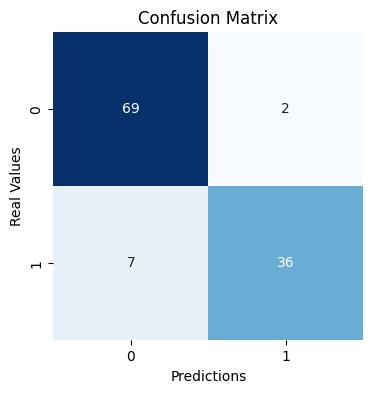

In [219]:
#First we separate the parameters and the target varibles
y = data['diagnosis']
X = X_normalized

#Then we separate the data between the tests and the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#Then we train the model and fit it
model= RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("Accuracy Score: ", accuracy_score(y_test, model.predict(X_test)))

# show the confusion matrix
confu_matrix = confusion_matrix(y_test, model.predict(X_test))
plt.figure(figsize=(4, 4))
sns.heatmap(confu_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predictions')
plt.ylabel('Real Values')
plt.title('Confusion Matrix')
plt.show()

Now we are going to **change the outliers** and **normalize** the data and see if there is any change: 

In [221]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler (learn the transformation parameters)
scaler.fit(X_no_outliers)

# Now you can use the transform method to normalize new data
X_normalized_no_outliers = scaler.transform(X_no_outliers)
print(f"Starting data: {X}")
print("-----------------------------------------------------------")
print(f"Normalized data: {X_normalized_no_outliers}")

Starting data: [[0.91202749 0.88418998 0.8805513  0.32707475 0.03129379]
 [0.63917526 0.4892648  0.20551302 0.24513157 0.3764596 ]
 [0.83505155 0.65647365 0.30719755 0.30969498 0.53900047]
 ...
 [0.48728522 0.34482759 0.19969372 0.29245481 0.85801028]
 [0.91065292 0.86987638 0.618683   0.33565994 0.91639421]
 [0.         0.34287573 0.2719755  0.3822154  0.69266698]]
-----------------------------------------------------------
Normalized data: [[0.91202749 0.88418998 0.8805513  0.32707475 0.03129379]
 [0.63917526 0.4892648  0.20551302 0.24513157 0.3764596 ]
 [0.83505155 0.65647365 0.30719755 0.30969498 0.53900047]
 ...
 [0.48728522 0.34482759 0.19969372 0.29245481 0.85801028]
 [0.91065292 0.86987638 0.618683   0.33565994 0.91639421]
 [0.         0.34287573 0.2719755  0.3822154  0.69266698]]


Accuracy Score:  0.9210526315789473


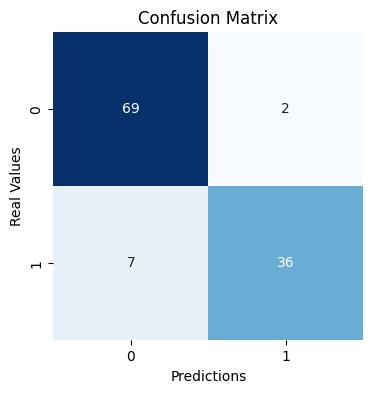

In [222]:
#Finally train the model with the reworked data:
#First we separate the parameters and the target varibles
y = data['diagnosis']
X = X_normalized_no_outliers

#Then we separate the data between the tests and the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#Then we train the model and fit it
model= RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("Accuracy Score: ", accuracy_score(y_test, model.predict(X_test)))

# show the confusion matrix
confu_matrix = confusion_matrix(y_test, model.predict(X_test))
plt.figure(figsize=(4, 4))
sns.heatmap(confu_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predictions')
plt.ylabel('Real Values')
plt.title('Confusion Matrix')
plt.show()

As you can see, the data was good enough so that the outliers and the absence of normal distribution **didnt** affect the model.

## Same process using a common pipeline

In [194]:
#First we have to import everything necessary for the pipeline:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
Accuracy Score:  0.9385964912280702


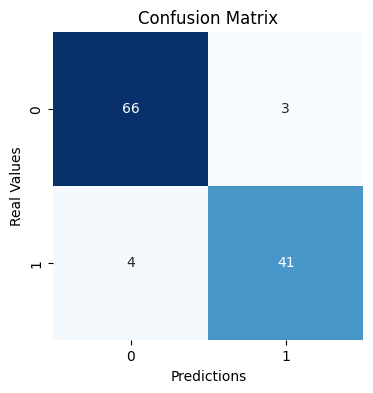

In [223]:
#Here we are going to try and recreate the path done before this part.

y = data['diagnosis']
X = data.iloc[:,1:34]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#doing the standarization with MinMaxScaler and use decision tree
pipe = Pipeline([('scaler', MinMaxScaler()), ('decision_tree', DecisionTreeClassifier())], verbose = True)

# fitting the data in the pipeline
pipe.fit(X_train, y_train)

print("Accuracy Score: ", accuracy_score(y_test, pipe.predict(X_test)))

# show the confusion matrix
confu_matrix = confusion_matrix(y_test, pipe.predict(X_test))
plt.figure(figsize=(4, 4))
sns.heatmap(confu_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predictions')
plt.ylabel('Real Values')
plt.title('Confusion Matrix')
plt.show()

From the pipeline above we can see that the variables chosen by us seem to be the same ones implemented in the model above. They got the **same** scores! (or maybe is just a coincidence caused by the selected data).

The following code will use some additional functionalities from other pipelines found at _"eda_course"_ trying to get an even better model.

[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.0s
[Pipeline] ..... (step 3 of 3) Processing decision_tree, total=   0.0s
Accuracy Score:  0.8947368421052632


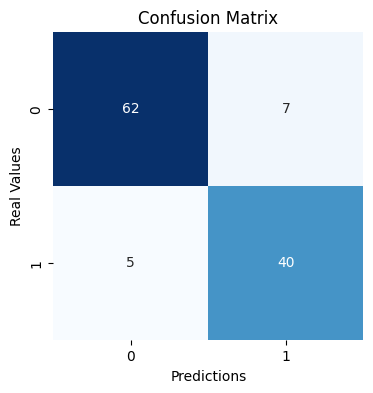

In [224]:
#Now we add PCA, used from another pipeline, that showed better performance.
y = data['diagnosis']
X = data.iloc[:,1:34]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#Using 4 components since I used 4 variables and would 
pipe = Pipeline([('pca', PCA(n_components = 4)),('scaler', MinMaxScaler()), ('decision_tree', DecisionTreeClassifier())], verbose = True)

# fitting the data in the pipeline
pipe.fit(X_train, y_train)

print("Accuracy Score: ", accuracy_score(y_test, pipe.predict(X_test)))

# show the confusion matrix
confu_matrix = confusion_matrix(y_test, pipe.predict(X_test))
plt.figure(figsize=(4, 4))
sns.heatmap(confu_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predictions')
plt.ylabel('Real Values')
plt.title('Confusion Matrix')
plt.show()

It didnt do that good as the other models, so we will use the pipeline with the same process we did.

Just for fun, we will try another pipeline we used in other session that showed the best results (uses a different model):

Accuracy Score:  0.956140350877193


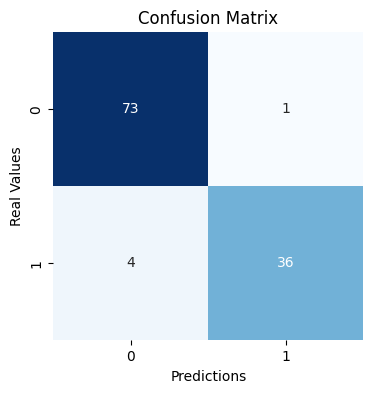

In [225]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

y = data['diagnosis']
X = data.iloc[:,1:34]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#Using 4 components for the same reason than before
pipe = Pipeline([('pca', PCA(n_components = 4)), ('scaler', StandardScaler()),('svc', SVC())])

# fitting the data in the pipeline
pipe.fit(X_train, y_train)

print("Accuracy Score: ", accuracy_score(y_test, pipe.predict(X_test)))

# show the confusion matrix
confu_matrix = confusion_matrix(y_test, pipe.predict(X_test))
plt.figure(figsize=(4, 4))
sns.heatmap(confu_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predictions')
plt.ylabel('Real Values')
plt.title('Confusion Matrix')
plt.show()

Accuracy Score:  0.9385964912280702


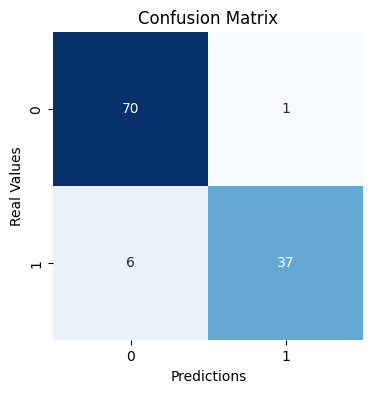

In [226]:
#Finally train the model with the reworked data:
#First we separate the parameters and the target varibles
y = data['diagnosis']
X = X_normalized_no_outliers

#Then we separate the data between the tests and the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#Then we train the model and fit it
model= SVC()
model.fit(X_train, y_train)

print("Accuracy Score: ", accuracy_score(y_test, model.predict(X_test)))

# show the confusion matrix
confu_matrix = confusion_matrix(y_test, model.predict(X_test))
plt.figure(figsize=(4, 4))
sns.heatmap(confu_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predictions')
plt.ylabel('Real Values')
plt.title('Confusion Matrix')
plt.show()

# It looks like for this proyect, doing everything with a pipeline was more accurate than the entire process done by hand. 

The Principal Componen Analysis seems to have a positive inpact on the accuracy score of the model, so it could be implemented in the analysis by hang.

The SVC once again seems to be the best model for this data set, and in general, have the biggest impact in the output. 